In [134]:
import pandas as pd
import pathlib
import os
import time
import re
import matplotlib.pyplot as plt


In [151]:
# Define the figure size and dpi
fig_width = 6.9  # inches
fig_height = 3.5  # inches
fig_dpi = 350

plt.rcParams.update({
    'figure.figsize': (fig_width, fig_height),
    'figure.dpi': fig_dpi,

    # Fonts
    'font.size': 18,

    # Axes
    'axes.labelsize': 12,
    'axes.titlesize': 12,
    'axes.linewidth': 1,
    'axes.grid': True,
    'grid.linestyle': ':',
    'grid.linewidth': 1,
    'grid.color': 'gray',

    # Legend
    'legend.fontsize': 8,
    'legend.frameon': True,
    'legend.framealpha': 0.8,
    'legend.fancybox': False,
    'legend.edgecolor': 'gray',
    'legend.facecolor': 'white',
    'legend.borderaxespad': 0.5,
    'legend.borderpad': 0.4,
    'legend.labelspacing': 0.5,

    # Lines
    'lines.linewidth': 2.0,
    'lines.markersize': 2,
    'axes.labelsize': 10,
    'axes.titlesize': 12,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
})

In [135]:
path_parquets = pathlib.Path("/export/usuarios_ml4ds/cggamella/NP-Search-Tool/sample_data/all_processed")
path_place_esp = path_parquets / "df_esp_langid.parquet"
path_manual_stops = pathlib.Path("/export/usuarios_ml4ds/cggamella/NP-Search-Tool/sample_data/stopwords_sin_duplicados")
path_eq = pathlib.Path("/export/usuarios_ml4ds/cggamella/NP-Search-Tool/sample_data/eq.txt")
path_place_without_lote  = "/export/usuarios_ml4ds/cggamella/NP-Search-Tool/sample_data/all_processed/minors_insiders_outsiders_origen_sin_lot_info.parquet"

In [136]:
origin_info = pd.read_parquet(path_place_without_lote)

In [137]:
origin_info

,id_tm,origen,title,summary,text
identifier,,,,,
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/499,0,minors,Reforma de elementos de ventilación exterior d...,Id licitación: 000103/2017-1069; Órgano de Con...,Reforma de elementos de ventilación exterior d...
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/498,1,minors,Servicios de calibrado y certificado de dos de...,Id licitación: 29-2017-II; Órgano de Contratac...,Servicios de calibrado y certificado de dos de...
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/497,2,minors,"Patrocinio menor proyecto "" Activitats C.I.N.E""",Id licitación: 013-07-2018; Órgano de Contrata...,"Patrocinio menor proyecto "" Activitats C.I.N.E..."
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/496,3,minors,Redacción EPIA - Legalización antena emisora d...,Id licitación: CON/2017/51; Órgano de Contrata...,Redacción EPIA - Legalización antena emisora d...
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/495,4,minors,Obras de reparación del Centro de Información ...,Id licitación: 000047/2017-1069; Órgano de Con...,Obras de reparación del Centro de Información ...
...,...,...,...,...,...
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores.atom/4,3110256,outsiders,concesion de servicios de peluquerías en 10 cp...,Id licitación: CONTR 2023 0000922771; Órgano d...,concesion de servicios de peluquerías en 10 cp...
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores.atom/3,3110257,outsiders,Servicios y suministros para la seguridad inte...,Id licitación: CR050-23-087B; Órgano de contra...,Servicios y suministros para la seguridad inte...
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores.atom/2,3110258,outsiders,Contrato de concesión de servicios para la ges...,Id licitación: CONTR 2023 0001215494; Órgano d...,Contrato de concesión de servicios para la ges...


In [138]:
processed = pd.read_parquet(path_place_esp)
cols = processed.columns.values.tolist()
print(cols)
processed['identifier'] = processed.index
processed

['id_tm', 'raw_text', 'lemmas', 'lang']


,id_tm,raw_text,lemmas,lang,identifier
identifier,,,,,
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/499,0,Reforma de elementos de ventilación exterior d...,reforma elemento ventilación exterior aire_aco...,es,contratosMenoresPerfilesContratantes_2018.zip/...
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/498,1,Servicios de calibrado y certificado de dos de...,calibrado certificado detector portátil gas tr...,es,contratosMenoresPerfilesContratantes_2018.zip/...
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/497,2,"Patrocinio menor proyecto "" Activitats C.I.N.E""",patrocinio activitats,es,contratosMenoresPerfilesContratantes_2018.zip/...
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/495,4,Obras de reparación del Centro de Información ...,centro información naturaleza rellano,es,contratosMenoresPerfilesContratantes_2018.zip/...
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/494,5,Diversos materiales para el acondicionamiento ...,rotonda arriat decoracion jardinera maceta via...,es,contratosMenoresPerfilesContratantes_2018.zip/...
...,...,...,...,...,...
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores.atom/4,3110256,concesion de servicios de peluquerías en 10 cp...,concesion cpas dependiente dt,es,PlataformasAgregadasSinMenores_202401.zip/Plat...
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores.atom/3,3110257,Servicios y suministros para la seguridad inte...,integral veiasa,es,PlataformasAgregadasSinMenores_202401.zip/Plat...
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores.atom/2,3110258,Contrato de concesión de servicios para la ges...,concesión integral cfa,es,PlataformasAgregadasSinMenores_202401.zip/Plat...


In [139]:
cols

['id_tm', 'raw_text', 'lemmas', 'lang']

In [140]:
processed_origin = pd.merge(processed,origin_info,how='left', on='id_tm')
processed_origin.set_index('identifier', inplace=True)
processed_origin[cols + ["origen"]]

,id_tm,raw_text,lemmas,lang,origen
identifier,,,,,
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/499,0,Reforma de elementos de ventilación exterior d...,reforma elemento ventilación exterior aire_aco...,es,minors
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/498,1,Servicios de calibrado y certificado de dos de...,calibrado certificado detector portátil gas tr...,es,minors
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/497,2,"Patrocinio menor proyecto "" Activitats C.I.N.E""",patrocinio activitats,es,minors
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/495,4,Obras de reparación del Centro de Información ...,centro información naturaleza rellano,es,minors
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/494,5,Diversos materiales para el acondicionamiento ...,rotonda arriat decoracion jardinera maceta via...,es,minors
...,...,...,...,...,...
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores.atom/4,3110256,concesion de servicios de peluquerías en 10 cp...,concesion cpas dependiente dt,es,outsiders
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores.atom/3,3110257,Servicios y suministros para la seguridad inte...,integral veiasa,es,outsiders
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores.atom/2,3110258,Contrato de concesión de servicios para la ges...,concesión integral cfa,es,outsiders


In [141]:
stopwords = set()
# Lista para registrar los nombres de los archivos procesados
archivos_procesados = []
# Iterar sobre cada archivo en el directorio especificado
for archivo in os.listdir(path_manual_stops):
    if archivo.endswith('.txt'):
        ruta_completa = os.path.join(path_manual_stops, archivo)
        with open(ruta_completa, 'r', encoding='utf-8') as f:
            stopwords.update(f.read().splitlines())
        archivos_procesados.append(archivo)  # Registrar el archivo procesado
# Imprimir los archivos procesados
print("Archivos .txt procesados:")
for archivo in archivos_procesados:
    print(archivo)

Archivos .txt procesados:
apellidos.txt
companies_stops.txt
tf_idf.txt
nombres.txt
gentilicios.txt
common_stopwords.txt
administracion.txt
ccaa_ciudades.txt
municipios.txt
more_stops.txt
ministerios.txt


In [131]:
def eliminar_stopwords(fila):
    return ' '.join([palabra for palabra in fila.split() if palabra not in stopwords])

In [132]:
start = time.time()
df_no_stops = processed.copy()
processed['lemmas'] = processed['lemmas'].apply(eliminar_stopwords)  
print(f"Time taken {time.time() - start}")

Time taken 4.362791538238525


In [142]:
processed['len'] = processed['lemmas'].apply(lambda x: len(x.split()))
df_no_stops['len'] = df_no_stops['lemmas'].apply(lambda x: len(x.split()))
processed

,id_tm,raw_text,lemmas,lang,identifier,len
identifier,,,,,,
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/499,0,Reforma de elementos de ventilación exterior d...,reforma elemento ventilación exterior aire_aco...,es,contratosMenoresPerfilesContratantes_2018.zip/...,13
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/498,1,Servicios de calibrado y certificado de dos de...,calibrado certificado detector portátil gas tr...,es,contratosMenoresPerfilesContratantes_2018.zip/...,6
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/497,2,"Patrocinio menor proyecto "" Activitats C.I.N.E""",patrocinio activitats,es,contratosMenoresPerfilesContratantes_2018.zip/...,2
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/495,4,Obras de reparación del Centro de Información ...,centro información naturaleza rellano,es,contratosMenoresPerfilesContratantes_2018.zip/...,4
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/494,5,Diversos materiales para el acondicionamiento ...,rotonda arriat decoracion jardinera maceta via...,es,contratosMenoresPerfilesContratantes_2018.zip/...,6
...,...,...,...,...,...,...
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores.atom/4,3110256,concesion de servicios de peluquerías en 10 cp...,concesion cpas dependiente dt,es,PlataformasAgregadasSinMenores_202401.zip/Plat...,4
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores.atom/3,3110257,Servicios y suministros para la seguridad inte...,integral veiasa,es,PlataformasAgregadasSinMenores_202401.zip/Plat...,2
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores.atom/2,3110258,Contrato de concesión de servicios para la ges...,concesión integral cfa,es,PlataformasAgregadasSinMenores_202401.zip/Plat...,3


In [115]:
average_length = processed['len'].mean()
average_length

4.901211494456546

In [117]:
max(processed['len'])

125

In [106]:
df = processed[(processed['len'] < 15) & (processed['len'] > 2)]

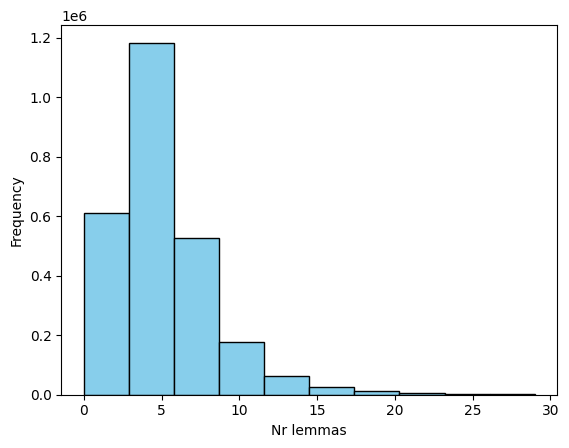

In [147]:
plt.hist(df_no_stops[df_no_stops.len<30]['len'], bins=10, color='skyblue', edgecolor='black')


# Adding labels and title
plt.xlabel('Nr lemmas')
plt.ylabel('Frequency')

# Displaying the histogram
plt.show()

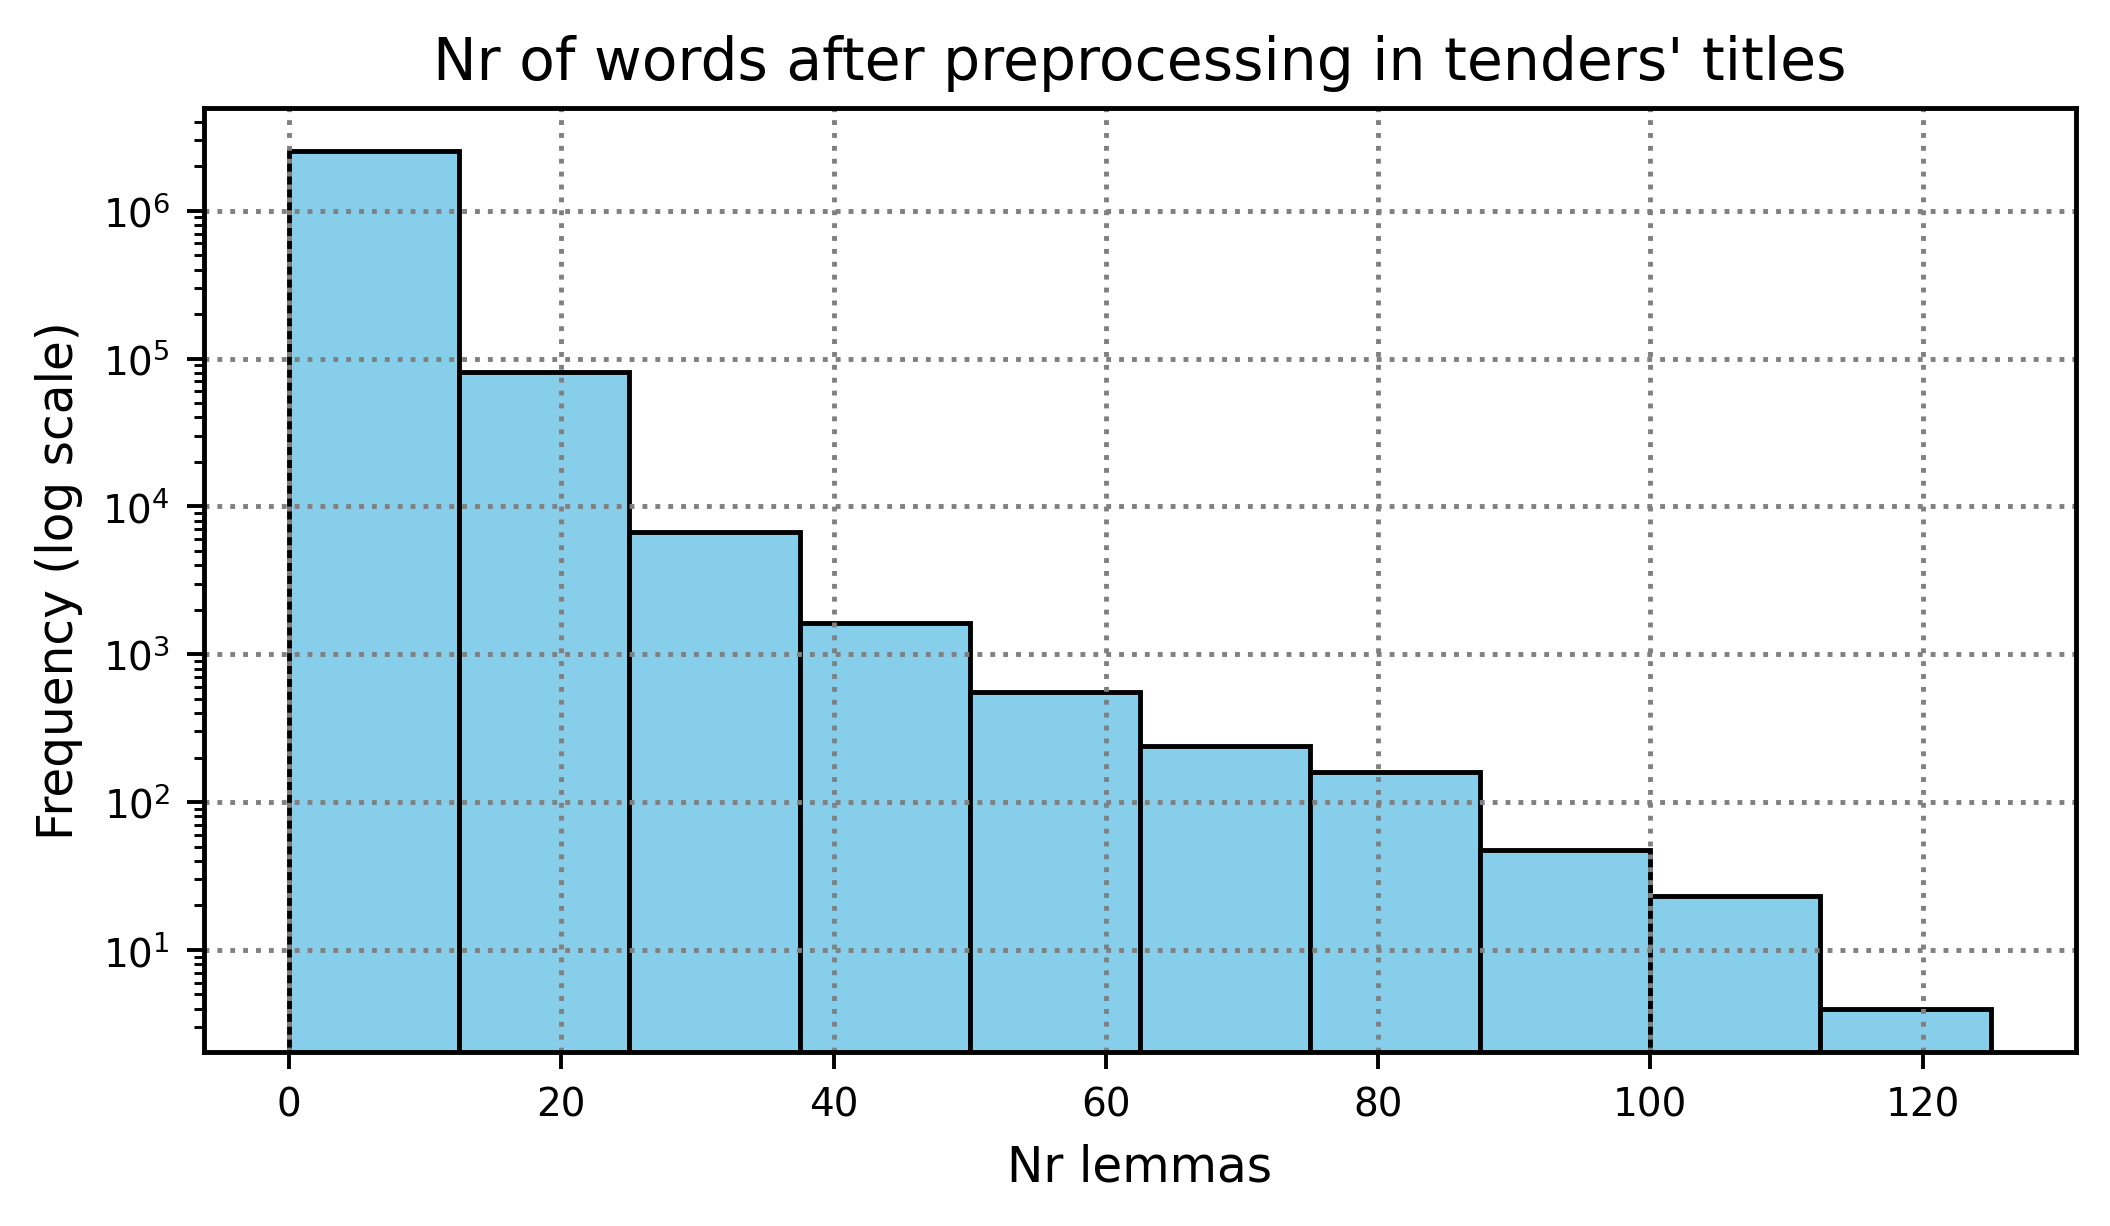

In [154]:
plt.hist(df_no_stops['len'], bins=10, color='skyblue', edgecolor='black')
plt.yscale('log')  # Set logarithmic scale on the y-axis

# Adding labels and title
plt.xlabel('Nr lemmas')
plt.ylabel('Frequency (log scale)')
plt.title("Nr of words after preprocessing in tenders' titles")
plt.savefig('foo.png', bbox_inches='tight')

# Displaying the histogram
plt.show()

In [35]:
start = time.time()
pares_diccionario = {}
compiled_regexes = {}

with open(path_eq, 'r') as archivo:
    for linea in archivo:
        linea = linea.strip()
        palabras = linea.split(':')
        if len(palabras) < 2:
            print(f"Línea omitida o incompleta: '{linea}'")
            time.sleep(20)
            continue
        
        #patron = r'\b{}\b'.format(re.escape(palabras[0]))
        #compiled_regexes[patron] = re.compile(patron)  # Precompile regex
        pares_diccionario[palabras[0]] = palabras[1]

pares_diccionario = dict(sorted(pares_diccionario.items(), key=lambda x: x[0]))
end = time.time()
print("Time taken:", end - start)

Time taken: 0.005156040191650391


In [49]:
processed["lemmas_split"] = processed['lemmas'].apply(lambda x: x.split())
processed.iloc[0].lemmas_split

['villa_molina', 'caudal', 'confort']

In [50]:
replace_keywords(['villa_molina', 'caudal', 'confort'], pares_diccionario)

'villa_molina caudal confort'

In [84]:
def replace_keywords(lst, keyword_dict):
    return " ".join([keyword_dict.get(word, word) for word in lst])

start = time.time()
processed["lemmas_split"] = processed['lemmas'].apply(lambda x: x.split())
processed['lemmas'] = processed['lemmas_split'].apply(lambda x: replace_keywords(x, pares_diccionario))
end = time.time()
print("Time taken:", end - start)

Time taken: 9.305028915405273


In [85]:
processed = processed.drop(columns=['lemmas_split'])
processed

,id_tm,raw_text,lemmas,lang,identifier
identifier,,,,,
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/499,0,Reforma de elementos de ventilación exterior d...,reforma elemento ventilación exterior aire_aco...,es,contratosMenoresPerfilesContratantes_2018.zip/...
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/498,1,Servicios de calibrado y certificado de dos de...,calibrado certificado detector portátil gas tr...,es,contratosMenoresPerfilesContratantes_2018.zip/...
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/497,2,"Patrocinio menor proyecto "" Activitats C.I.N.E""",patrocinio activitats,es,contratosMenoresPerfilesContratantes_2018.zip/...
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/495,4,Obras de reparación del Centro de Información ...,centro información naturaleza rellano,es,contratosMenoresPerfilesContratantes_2018.zip/...
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/494,5,Diversos materiales para el acondicionamiento ...,rotonda arriat decoracion jardinera maceta via...,es,contratosMenoresPerfilesContratantes_2018.zip/...
...,...,...,...,...,...
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores.atom/4,3110256,concesion de servicios de peluquerías en 10 cp...,concesion cpas dependiente dt,es,PlataformasAgregadasSinMenores_202401.zip/Plat...
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores.atom/3,3110257,Servicios y suministros para la seguridad inte...,integral veiasa,es,PlataformasAgregadasSinMenores_202401.zip/Plat...
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores.atom/2,3110258,Contrato de concesión de servicios para la ges...,concesión integral cfa,es,PlataformasAgregadasSinMenores_202401.zip/Plat...
